## Can Alzheimer be predicted?

### 1. Sourcing and Loading 


#### 1.1. Importing Libraries

In [180]:
# import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
This MRI data sets has been taken from Open Access Series of Imaging Studies (OASIS)
which is a project aimed at making MRI data sets of the brain freely available to the
scientific community. OASIS is made available by the Washington University Alzheimer’s
Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)
(at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University
School of Medicine,and the Biomedical Informatics Research Network (BIRN).

In [181]:
# First, make a variable called Cross-sec, and assign it to cross-sectional 
# collection of 416 subjects
Cross_sec = pd.read_csv('Data/oasis_cross-sectional.csv', index_col= None)
# Second, make a second variable called Long-sec, and assign it to longitudinal
#collection of 150 subjects
Long_sec = pd.read_csv('Data/oasis_longitudinal.csv', index_col= None)

Staging patients diagnosed with dementia is determined by a global rating scale, called clinical dementia rating scale (**CDR** ). The CDR evaluates cognitive, behavioral, and functional aspects of Alzheimer disease and other dementias. Features used for applying machine learning from these two sets of data include age, education, gender, socioeconomic status (**SES**), Mini-Mental State Exam (**MMSE**) which is a test of cognitive function, **eTIV** - estimated Total Intracranial Volume (sum of brain, ventricular, and extraventricular CSF) and brain volumes (**nWBV**), and Atlas Scaling Factor (**ASF**) which is volume-scaling factor required to match each individual to the atlas target.

### 2. Cleaning, transforming, and visualizing

## 2.1. Exploring the data


In [182]:
Cross_sec.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [183]:
Long_sec.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## 2.2. Cleaning the data

In [184]:
Cross_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [185]:
Long_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


#### Check if data are all for right hand or left hand or both? 

In [186]:
Cross_sec['Hand'].unique()

array(['R'], dtype=object)

In [187]:
Long_sec['Hand'].unique()

array(['R'], dtype=object)

So all the data are from right hand poeple, thefore we do not need to keep this column

In [188]:
Cross_sec = Cross_sec.drop(['Hand'], axis = 1)

In [189]:
Long_sec = Long_sec.drop(['Hand'], axis = 1)

In [190]:
Long_sec['M/F'].value_counts()

F    213
M    160
Name: M/F, dtype: int64

#### Counts the number of subjects scanned for Longitudinal and cross sectional 

In [191]:
Cross_sec['ID'].value_counts().sum()

436

In [192]:
Long_sec['Subject ID'].value_counts().sum()

373

#### Renaming the similar columns in both group to the same name 

In [193]:
Cross_sec.columns

Index(['ID', 'M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'Delay'],
      dtype='object')

In [194]:
Long_sec.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [195]:
Cross_sec = Cross_sec.rename(columns={'ID':'Subject ID'})

In [196]:
Long_sec = Long_sec.rename(columns={'EDUC':'Educ'})

#### Finding the number of Null values for differnt features 

In [197]:
Cross_sec.isna().sum()

Subject ID      0
M/F             0
Age             0
Educ          201
SES           220
MMSE          201
CDR           201
eTIV            0
nWBV            0
ASF             0
Delay         416
dtype: int64

In [198]:
Long_sec.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
Educ           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [199]:
Cross_sec = Cross_sec.drop(['Delay'], axis = 1)

In [200]:
Cross_sec[Cross_sec['Educ'].isna()]['MMSE'].isna().sum()

201

In [201]:
Cross_sec[Cross_sec['Educ'].isna()]['CDR'].isna().sum()

201

In [202]:
Cross_sec[Cross_sec['SES'].isna()]['CDR'].isna().sum()

201

In [203]:
Cross_sec[Cross_sec['SES'].isna()]['MMSE'].isna().sum()

201

In [204]:
Cross_sec[Cross_sec['SES'].isna()]['Educ'].isna().sum()

201

#### There are 201 observation that have NAN value for MMSE, Educ, CDR, SES

In [205]:
Cross_sec_cl = Cross_sec[Cross_sec['CDR'].notna()]

In [206]:
Cross_sec_cl.isna().sum()

Subject ID     0
M/F            0
Age            0
Educ           0
SES           19
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

 Filling the NAN value with the median for social economy status, SES,  column

In [207]:
#It is better to remove the null observation for MMSE, 
# because this is a mental test and also there are only two observations with Null value for MMSE.
Long_sec_cl = Long_sec
Long_sec_cl = Long_sec[Long_sec['MMSE'].notna()]

In [208]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
SES_np = Long_sec_cl['SES'].to_numpy() 
SES_np=SES_np.reshape(-1, 1) 
imp = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(SES_np)
Long_sec_cl['SES']= imp.fit_transform(SES_np)
Long_sec_cl.isna().sum()

<ipython-input-208-1d0138cea55e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Long_sec_cl['SES']= imp.fit_transform(SES_np)


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [209]:
SES_np1 = Cross_sec_cl['SES'].to_numpy() 
SES_np1=SES_np1.reshape(-1, 1) 
imp1 = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(SES_np)
Cross_sec_cl['SES']= imp.fit_transform(SES_np1)
Cross_sec_cl.isna().sum()

<ipython-input-209-25564cd4b3c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cross_sec_cl['SES']= imp.fit_transform(SES_np1)


Subject ID    0
M/F           0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

The CDR is based on a scale of 0–3: no dementia (CDR = 0), questionable dementia (CDR = 0.5), MCI (CDR = 1), moderate cognitive impairment (CDR = 2), and severe cognitive impairment (CDR = 3)

In [210]:
Cross_sec_cl[Cross_sec_cl['CDR'] >0].count()

Subject ID    100
M/F           100
Age           100
Educ          100
SES           100
MMSE          100
CDR           100
eTIV          100
nWBV          100
ASF           100
dtype: int64

So in group 1, there are 100 Dementia. 

In [211]:
Long_sec_cl[Long_sec_cl['CDR'] >0].count()

Subject ID    165
MRI ID        165
Group         165
Visit         165
MR Delay      165
M/F           165
Age           165
Educ          165
SES           165
MMSE          165
CDR           165
eTIV          165
nWBV          165
ASF           165
dtype: int64

There are 165 Demnetia in the observations in longitudinal study, 
and some of these data obtained from the same subject (Same subject ID) during study.
I consider these repeated measurments as a new measurment. 

Therfore I removed few columns such as MR Delay, Group
, Visit, Subject ID, MRI ID from longitudinal data 

In [212]:
Long_sec_cl.drop(columns=['MR Delay', 'Group' , 'Visit', 'Subject ID', 'MRI ID'], inplace = True)

/Users/masoumeh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [213]:
Cross_sec_cl.drop(columns=['Subject ID'],inplace=True)

In [214]:
Cross_Long = pd.concat([Long_sec_cl,Cross_sec_cl])

In [215]:
Cross_Long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 415
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     606 non-null    object 
 1   Age     606 non-null    int64  
 2   Educ    606 non-null    float64
 3   SES     606 non-null    float64
 4   MMSE    606 non-null    float64
 5   CDR     606 non-null    float64
 6   eTIV    606 non-null    int64  
 7   nWBV    606 non-null    float64
 8   ASF     606 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 47.3+ KB


## 2.3 Exploratory Data Analysis (EDA)

In [220]:
Cross_Long.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,606.0,75.206271,9.881046,33.000,70.000,76.000,82.00000,98.000
Educ,606.0,10.178218,6.067493,1.000,4.000,12.000,16.00000,23.000
SES,606.0,2.472198,1.093980,1.000,2.000,2.000,3.00000,5.000
MMSE,606.0,27.234323,3.687980,4.000,26.000,29.000,30.00000,30.000
CDR,606.0,0.286304,0.376096,0.000,0.000,0.000,0.50000,2.000
eTIV,606.0,1478.095710,169.981897,1106.000,1354.000,1460.500,1569.00000,2004.000
nWBV,606.0,0.737129,0.042740,0.644,0.704,0.736,0.76675,0.847
ASF,606.0,1.202592,0.134173,0.876,1.118,1.202,1.29700,1.587


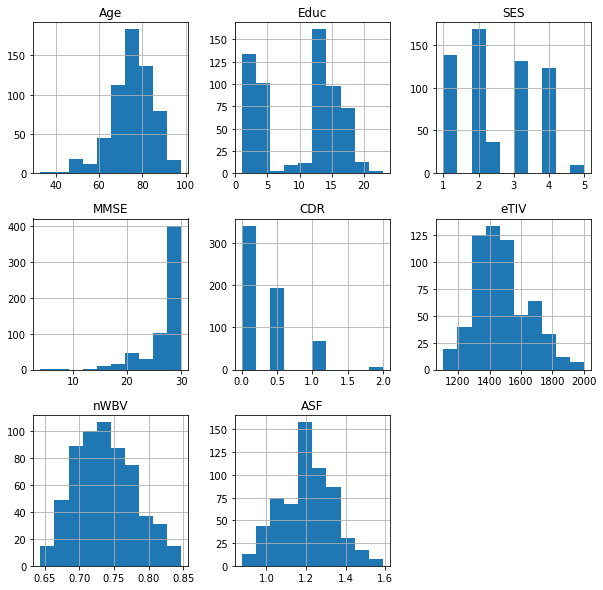

In [223]:
hist = Cross_Long.hist(bins=10,figsize =(10,10))

<AxesSubplot:xlabel='gender', ylabel='count'>

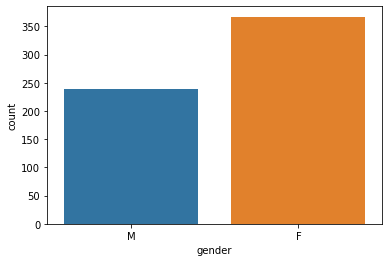

In [228]:
#select categorical variables only
import seaborn as sns
Cross_Long = Cross_Long.rename(columns={'M/F': 'gender'})

Cross_Long_cat = Cross_Long.select_dtypes(include = 'object').copy()#get counts of each variable value
Cross_Long_cat.gender.value_counts()#count plot for one variable
sns.countplot(data = Cross_Long_cat, x = 'gender')

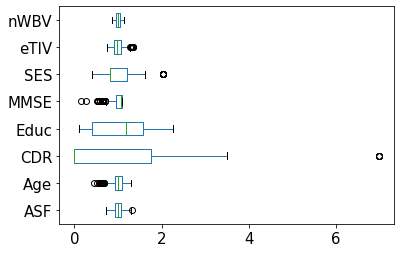

In [233]:
# outlier 
Cross_Long_norm = Cross_Long/Cross_Long.mean()
boxplot = Cross_Long_norm.boxplot(grid=False, vert=False,fontsize=15)

In [248]:
Cross_Long_norm[Cross_Long_norm['CDR']>6]

,ASF,Age,CDR,Educ,MMSE,SES,eTIV,gender,nWBV
184,0.971235,1.303083,6.985591,1.670233,0.771086,0.404498,1.016849,NaN,0.895366
251,1.041916,1.037148,6.985591,1.375486,0.550776,1.213495,0.947841,NaN,0.949631
330,0.853157,1.050444,6.985591,1.964981,0.917959,0.404498,1.156894,NaN,1.031028
278,1.041916,1.037148,6.985591,0.294747,0.550776,1.213495,0.947841,NaN,0.953700
317,0.965414,1.143522,6.985591,0.098249,0.550776,1.617994,1.022938,NaN,0.902149


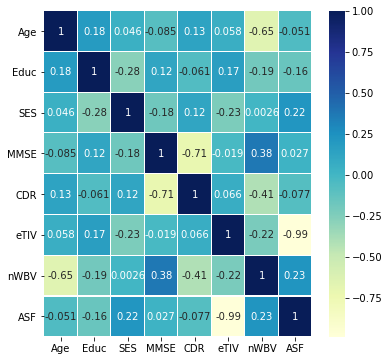

In [244]:
#create the correlation matrix heat map
plt.figure(figsize=(6,6))
sns.heatmap(Cross_Long.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

CDR has strong correlation with MMSE and nWBV which is measured using MRI.

In [217]:
Cross_Long_M = Cross_Long[Cross_Long['M/F']=='M']
Cross_Long_F = Cross_Long[Cross_Long['M/F']=='F']

Investigating the dependency of correlation to the gender 

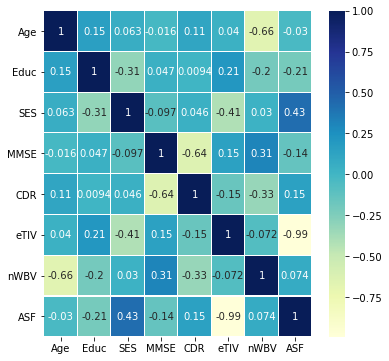

In [243]:
plt.figure(figsize=(6,6))
sns.heatmap(Cross_Long_M.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

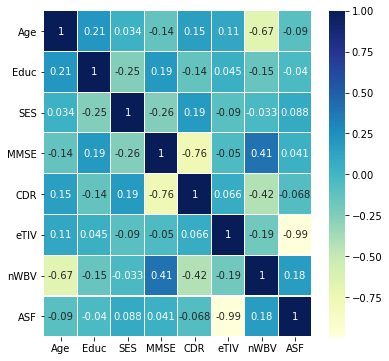

In [242]:
plt.figure(figsize=(6,6))
sns.heatmap(Cross_Long_F.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

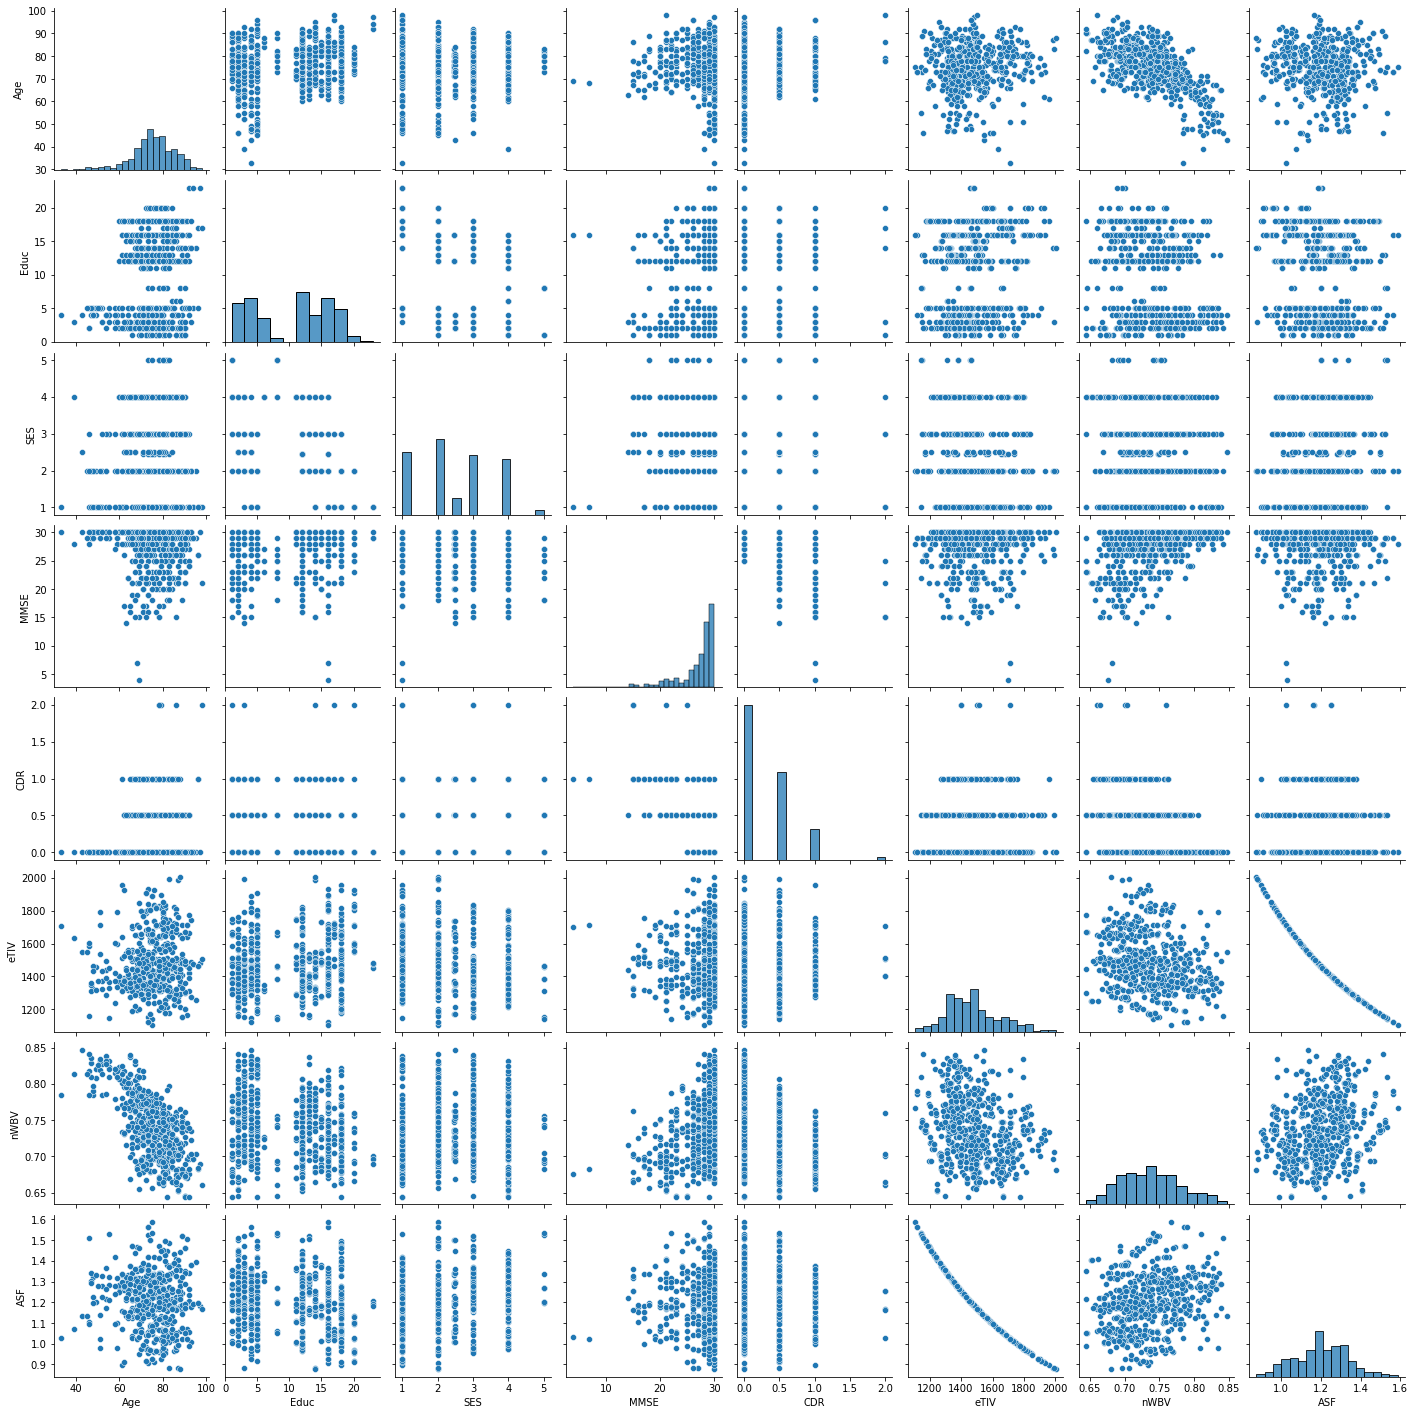

In [245]:
#pair plots
g = sns.pairplot(Cross_Long)